In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the movies dataset
movies = pd.read_csv("D:\\Artificial Intelligence\\Moive Success Prediction Classification Project\\Movie-Success-Prediction-Classification-Project\\data\\tmdb_5000_movies.csv")

# Read the credits dataset
credits = pd.read_csv("D:\\Artificial Intelligence\\Moive Success Prediction Classification Project\\Movie-Success-Prediction-Classification-Project\\data\\tmdb_5000_credits.csv")

# Merge on the common columns: id (movies) and movie_id (credits)
df = movies.merge(credits, left_on='id', right_on='movie_id', how='inner')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df.drop(columns=['movie_id'], inplace=True)
df.rename(columns={'title_x': 'title'}, inplace=True)
df.drop(columns=['title_y'], inplace=True)


In [4]:
df.columns.tolist()

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew']

## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**HISTOGRAMS**

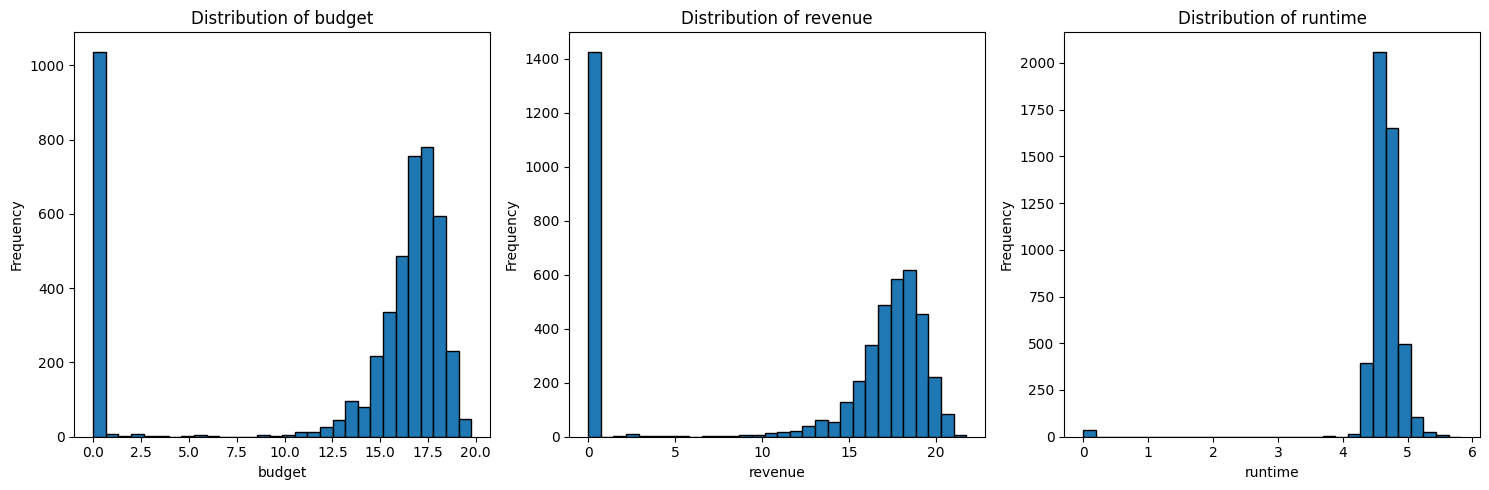

In [7]:
columns = ['budget', 'revenue', 'runtime']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i) 
    data = np.log1p(df[col].dropna())
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\roaam\AppData\Local\Temp\ipykernel_27296\2415415874.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data for col in columns],


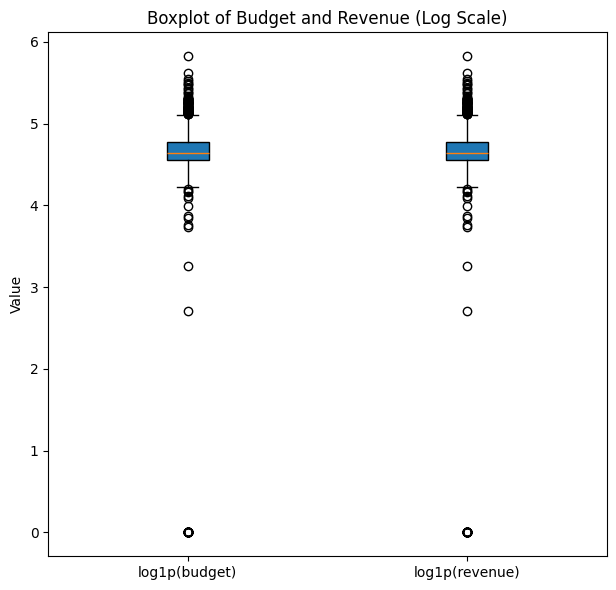

In [8]:
columns = ['budget', 'revenue']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.boxplot([data for col in columns],
            labels=[f"log1p({c})" for c in columns],
            patch_artist=True)
plt.title("Boxplot of Budget and Revenue (Log Scale)")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


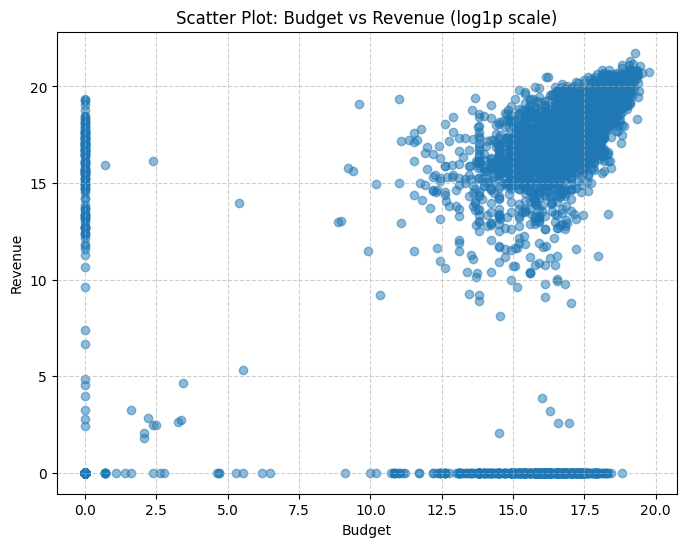

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(df['budget']), np.log1p(df['revenue']), alpha=0.5)

plt.title("Scatter Plot: Budget vs Revenue (log1p scale)")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


Top 10 Genres:
genres
Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Name: count, dtype: int64


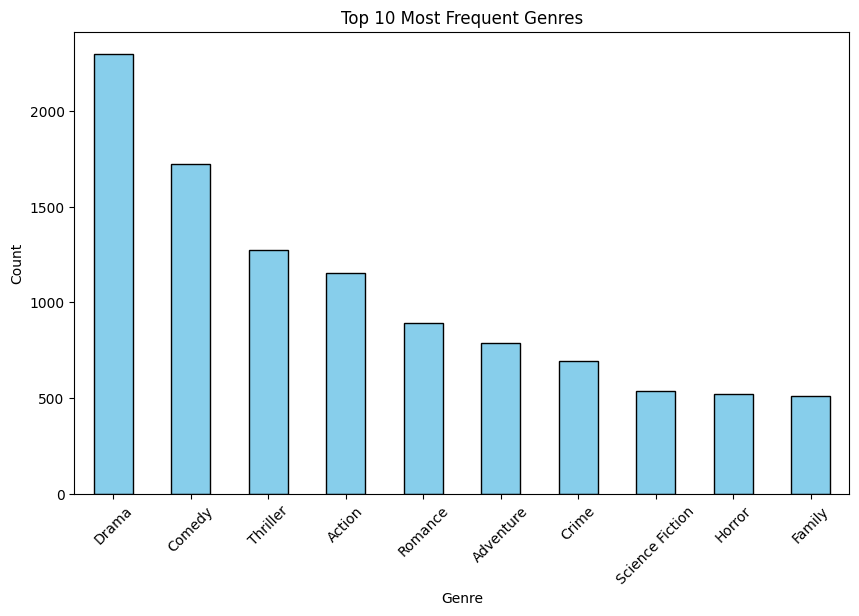

In [10]:
import ast

# Parse the JSON strings in the 'genres' column
all_genres = df['genres'].apply(lambda x: [g['name'] for g in ast.literal_eval(x)] if isinstance(x, str) and x.strip() else [])

genres_series = all_genres.explode()

genre_counts = genres_series.value_counts()

print("Top 10 Genres:")
print(genre_counts.head(10))

plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Corrlation Matrix**

Correlation Matrix:
              budget   revenue  popularity
budget      1.000000  0.730823    0.505414
revenue     0.730823  1.000000    0.644724
popularity  0.505414  0.644724    1.000000


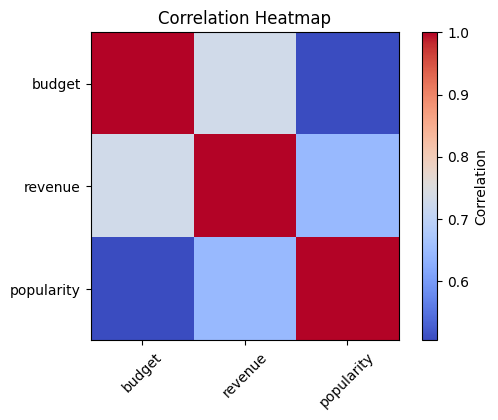

In [ ]:
cols = ['budget', 'revenue', 'popularity']
corr_matrix = df[cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(6,4))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from scipy.stats import skew, shapiro

# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

results = []

for col in num_cols:
    data = df[col].dropna()
    if len(data) < 10:
        continue
    
    skew_val = skew(data)
    sample = data.sample(5000, random_state=42) if len(data) > 5000 else data
    _, p = shapiro(sample)
    
    results.append({
        "Column": col,
        "Skewness": round(skew_val, 2),
        "Shapiro_p": round(p, 4),
        "Normal?": "Yes" if p > 0.05 else "No"
    })

summary = pd.DataFrame(results)
print(summary)


         Column  Skewness  Shapiro_p Normal?
0        budget      2.44        0.0      No
1            id      2.07        0.0      No
2    popularity      9.72        0.0      No
3       revenue      4.44        0.0      No
4       runtime      0.72        0.0      No
5  vote_average     -1.96        0.0      No
6    vote_count      3.82        0.0      No


## Data Cleaning

In [13]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [14]:
# Drop homepage (not useful)
df = df.drop(columns=['homepage'])

# Fill overview missing with a placeholder
df['overview'] = df['overview'].fillna("No overview available")

# Drop rows with missing release_date
df = df.dropna(subset=['release_date'])

# Fill runtime missing with median
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

# Fill tagline missing with a placeholder
df['tagline'] = df['tagline'].fillna("No tagline")


In [15]:
# Check number of duplicate rows
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# If you want to drop duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Number of duplicate rows: 0
Shape after removing duplicates: (4802, 21)


In [16]:
# Define capping function
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Apply capping
    df[column] = df[column].clip(lower, upper)
    return df

# Apply on selected numeric columns
for col in ['budget', 'revenue', 'runtime', 'popularity', 'vote_count']:
    df = cap_outliers(df, col)
    print(f"Capped outliers in {col}")



Capped outliers in budget
Capped outliers in revenue
Capped outliers in runtime
Capped outliers in popularity
Capped outliers in vote_count


In [17]:
# Convert release_date column to datetime (errors='coerce' makes invalid ones NaT)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Reformat all dates into a unified format (YYYY-MM-DD)
df['release_date'] = df['release_date'].dt.strftime('%Y-%m-%d')

# Preview
print(df['release_date'].head(4))


0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
Name: release_date, dtype: object


In [18]:
import ast
# Function to convert JSON string to list of names
def json_to_list(x):
    parsed = ast.literal_eval(x)  # Convert JSON string to Python object
    # If it's a list of dicts, extract 'name'
    if isinstance(parsed, list):
        return [i['name'] for i in parsed if 'name' in i]
    else:
        return parsed

# List of columns containing JSON-like strings
json_columns = [
    'genres', 'keywords', 'production_companies', 'production_countries',
    'spoken_languages', 'cast', 'crew'
]

# Apply conversion only to relevant columns
for col in json_columns:
    df[col] = df[col].apply(json_to_list)

# Display first rows
df.head()


,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,98800000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",63.822441,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,232297987.5,153.375,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,1761.5,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,98800000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",63.822441,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,232297987.5,153.375,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,1761.5,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,98800000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,63.822441,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,232297987.5,148.000,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,1761.5,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,98800000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,63.822441,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,232297987.5,153.375,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,1761.5,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,98800000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,232297987.5,132.000,[English],Released,"Lost in our world, found in another.",John Carter,6.1,1761.5,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."


## Data Preparation

**Encoding**

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
# Columns to encode with MultiLabelBinarizer
multi_columns = ['genres', 'production_companies', 'production_countries', 'spoken_languages']

mlb = MultiLabelBinarizer()

for col in multi_columns:
    encoded = pd.DataFrame(mlb.fit_transform(df[col]), columns=[f"{col}_{c}" for c in mlb.classes_], index=df.index)
    df = pd.concat([df, encoded], axis=1)
    df.drop(columns=[col], inplace=True)  # Drop original column

# Column to encode with One-Hot Encoding
df = pd.get_dummies(df, columns=['original_language'], prefix='lang')

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

# Flatten all cast lists
all_cast = [member for sublist in df['cast'] for member in sublist]
top_cast = [name for name, count in Counter(all_cast).most_common(50)]

# Encode top 50 cast members
for name in top_cast:
    df[f"cast_{name}"] = df['cast'].apply(lambda x: int(name in x))


all_crew = [member for sublist in df['crew'] for member in sublist]
top_crew = [name for name, count in Counter(all_crew).most_common(50)]
for name in top_crew:
    df[f"crew_{name}"] = df['crew'].apply(lambda x: int(name in x))

df.drop(columns=['cast','crew'], inplace=True)


C:\Users\roaam\AppData\Local\Temp\ipykernel_27296\942518124.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"crew_{name}"] = df['crew'].apply(lambda x: int(name in x))
C:\Users\roaam\AppData\Local\Temp\ipykernel_27296\942518124.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"crew_{name}"] = df['crew'].apply(lambda x: int(name in x))
C:\Users\roaam\AppData\Local\Temp\ipykernel_27296\942518124.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

**Feature Engineering**

In [23]:
df['profit'] = df['revenue'] - df['budget']

C:\Users\roaam\AppData\Local\Temp\ipykernel_27296\1302394368.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['profit'] = df['revenue'] - df['budget']


In [28]:
# Convert release_date to datetime again to extract year
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

In [29]:
# Create a feature: number of top cast members present in each movie
df['main_cast_count'] = df[[f'cast_{name}' for name in top_cast]].sum(axis=1)

**Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
num_cols = ['budget', 'runtime', 'revenue', 'popularity']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the columns
df[num_cols] = scaler.fit_transform(df[num_cols])



## Multi-Task Learning: Regression and Classification for Movie Data"

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [35]:
# Define success_class based on profit (e.g., top 25% movies are "successful")
threshold = df['profit'].quantile(0.75)
df['success_class'] = (df['profit'] >= threshold).astype(int)

x = df.drop(columns=['revenue', 'vote_average', 'vote_count', 'success_class', 'release_date'])
y_reg = df[['revenue', 'vote_average', 'vote_count']]  # numeric targets
y_clf = df['success_class']  # classification target

In [36]:
# Split data
x_train, x_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    x, y_reg, y_clf, test_size=0.2, random_state=42
)


In [39]:
# Scale only numeric columns in x_train and x_test
numeric_cols = x_train.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test_scaled[numeric_cols] = scaler.transform(x_test[numeric_cols])

**Step 1: Linear Regression for numeric targets**

In [42]:
# Drop non-numeric columns before fitting
x_train_num = x_train_scaled.select_dtypes(include=[np.number])
x_test_num = x_test_scaled.select_dtypes(include=[np.number])

lin_reg = LinearRegression()
lin_reg.fit(x_train_num, y_reg_train)
reg_preds_train = lin_reg.predict(x_train_num)
reg_preds_test = lin_reg.predict(x_test_num)


**Step 2: Add regression predictions as new features for classification**

In [44]:
# Only use numeric columns for stacking
X_train_stack = np.hstack([x_train_scaled.select_dtypes(include=[np.number]).values, reg_preds_train])
X_test_stack = np.hstack([x_test_scaled.select_dtypes(include=[np.number]).values, reg_preds_test])

**Step 3: Logistic Regression for classification using stacked features**

In [45]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_stack, y_clf_train)
clf_preds = log_reg.predict(X_test_stack)

**Evaluation**

In [46]:
print("Regression RMSE (per column):", ((reg_preds_test - y_reg_test)**2).mean()**0.5)

Regression RMSE (per column): revenue         1.481795e-14
vote_average    1.419151e+00
vote_count      3.538070e+02
dtype: float64


In [47]:
print("Classification Accuracy with stacked features:", accuracy_score(y_clf_test, clf_preds))

Classification Accuracy with stacked features: 0.9323621227887617
